In [116]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Computer Maestro\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [117]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [118]:
print(tf.__version__)

2.9.1


In [119]:
import glob

In [120]:
train_files=glob.glob("C:/Users/Computer Maestro/Desktop/flower/flowers/*/**")

In [121]:
from random import shuffle
shuffle( train_files)
train_files

['C:/Users/Computer Maestro/Desktop/flower/flowers\\E\\432758760_b27d346342_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\3\\15753173187_9ec5dedacf_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\9\\6892967880_1330788556_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\E\\12396147735_ffae6fa34f_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\B\\51109880573_b30a45b1be_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\A\\4625146771_551d6fdf86_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\5\\14115237783_0b2bbfd36b_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\A\\149490977_b6b55daade_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\D\\4864623927_a93b37bc9b_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\9\\2455861688_dd37b7188b_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\D\\2820460092_66b9b350f1_c.jpg',
 'C:/Users/Computer Maestro/Desktop/flower/flowers\\E\\25918148

In [122]:
def flower_class(fl):
    if fl.find("astilbe") != -1 :
        return 1
    elif fl.find("bellflower") != -1 :
        return 2
    elif fl.find("black_eyed_susan") != -1 :
        return 3
    elif fl.find("calendula") != -1 :
        return 4
    elif fl.find("california_poppy") != -1 :
        return 5
    elif fl.find("carnation") != -1 :
        return 6
    elif fl.find("common_daisy") != -1 :
        return 7
    elif fl.find("coreopsis") != -1 :
        return 8
    elif fl.find("daffodil") != -1 :
        return 9
    elif fl.find("iris") != -1 :
        return 10
    elif fl.find("magnolia") != -1 :
        return 11
    elif fl.find("rose") != -1 :
        return 12
    elif fl.find("sunflower") != -1 :
        return 13
    elif fl.find("tulip") != -1 :
        return 14
    else:
        return 0  #water lily

In [123]:
from PIL import Image

In [124]:
X_train=np.zeros((len(train_files),64,64,3))
Y_train=np.zeros((len(train_files)))   

In [125]:
for i,fl in enumerate(train_files):
    img = Image.open(fl)
    img = img.resize((64,64))
    arr = np.array(img)
    
    #image pixels normalized
    arr = arr/255
    if arr.shape == (64,64,3): #arrays that have other shape cannot fit in X_train
        X_train[i,:,:,:]=arr   
    d = fl[51]    
   
    if (d>='A' and d < 'Z'):
            if (d=='A') :
                Y_train[i] = 10
            elif (d=='B') :
                Y_train[i] = 11
            elif (d=='C'):
                Y_train[i] = 12
            elif (d=='D') :
                Y_train[i] = 13
            elif (d=='E') :
                Y_train[i] = 14
            elif (d=='F') :
                Y_train[i] = 15
    else :
          Y_train[i] = d

In [126]:
from matplotlib import pyplot as plt


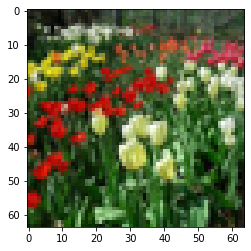

In [127]:
plt.imshow(X_train[0])

In [128]:
np.count_nonzero(Y_train == 0)

0

In [129]:
from keras import layers, Sequential

In [130]:
from keras.layers import Conv2D, Dense, Flatten

In [131]:
import keras_tuner

In [132]:
from keras_tuner import engine
from keras_tuner.engine.hyperparameters import HyperParameters as hp

In [133]:
def build_model(hp):  
    model = keras.Sequential([
    
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),#min value of filter you want
        kernel_size=hp.Choice('conv_1_kernel', values = [2,4]),#picks like mcq
        activation='relu',
        input_shape=(64,64,3)
        
    ),
    keras.layers.Dropout((0.5)),
      #for i in range(0,hp.Int(....)) this will also work
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),# ihave added this line extra in comparison to the old model
        kernel_size=hp.Choice('conv_2_kernel', values = [2,3]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
   # keras.layers.Dense(28, activation='sigmoid'),
   # keras.layers.Dense(28, activation='relu'),
    
    keras.layers.Dense(16, activation='softmax')
  ])
    
  
    model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model

In [134]:
tuner_search=keras_tuner.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=4,
    directory='output1',
)

INFO:tensorflow:Reloading Oracle from existing project output1\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from output1\untitled_project\tuner0.json


In [135]:
tuner_search.search(X_train, Y_train, epochs=2, validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


In [136]:
model = tuner_search.get_best_models(num_models=1)[0]

In [137]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 48)        2352      
                                                                 
 dropout (Dropout)           (None, 61, 61, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 222784)            0         
                                                                 
 dense (Dense)               (None, 64)                14258240  
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
Total params: 14,289,344
Trainable params: 14,289,344
No

In [140]:
model.fit(X_train, Y_train, epochs=3, validation_split=0.1,initial_epoch=2)

Epoch 3/3
443/443 [==============================] - 173s 389ms/step - loss: 2.0232 - accuracy: 0.1825 - val_loss: 2.4078 - val_accuracy: 0.1900
